# Library import

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data load

In [ ]:
df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2022년 1학기/산업 인공지능/TASK2-wafer map /LSWMD.pkl")

# EDA

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)을 통해 데이터가 어떠한 형태인지 살펴보세요!
ex) 열별로 데이터 종류, 개수세보기, 데이터 불균형 상태인지 막대그래프 그려보기, wafermap을 failureType별로 그려보기 등등..

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


# Check List
*  데이터 설명
*  예측해야 하는 target값의 분포
*  결측치 혹은 이상치
*  분류상 유의미한 데이터인지 판단



# data summary

In [ ]:
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
337258,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,...",999.0,lot20305,6.0,[],[]
151707,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3532.0,lot9805,15.0,[],[]
123900,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2860.0,lot8233,14.0,[],[]
570994,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot35756,5.0,[],[]
384555,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,lot23027,18.0,[],[]
49185,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2227.0,lot4067,1.0,[[Training]],[[Edge-Loc]]
561904,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot35322,17.0,[],[]
691212,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1129.0,lot42668,22.0,[[Test]],[[none]]
548938,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34398,15.0,[],[]
655858,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",776.0,lot40989,2.0,[[Test]],[[none]]


In [ ]:
df.info() #811,457 data with Non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


## sample wafer img

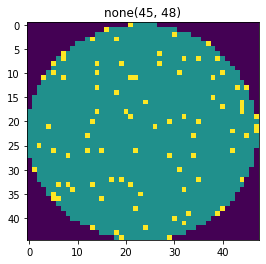

In [ ]:
idx = 0
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

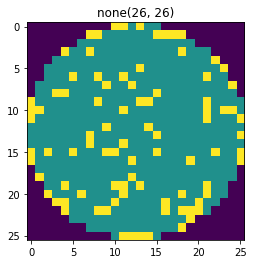

In [ ]:
idx = 1000
img = df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+ str(img.shape))
plt.imshow(img)

## lotName

### How to show help

In [ ]:
pd.DataFrame.plot.bar?

In [ ]:
pd.DataFrame.plot?

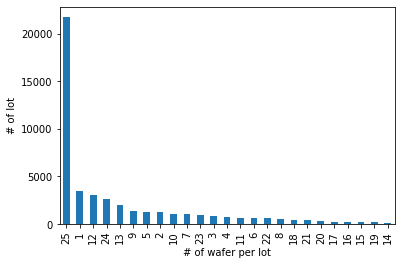

In [ ]:
bar_ = df.lotName.value_counts().value_counts().plot.bar(xlabel='# of wafer per lot',ylabel='# of lot')
bar_

## waferIndex

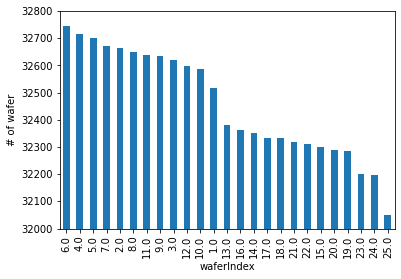

In [ ]:
df.waferIndex.value_counts().plot.bar(ylim=(32000,32800),xlabel='waferIndex',ylabel='# of wafer')

# New insight of data
*  조사결과 LOT은 wafer 25을 부르는 표현
*  1 lot = 25 wafers
*  데이터에서 wafer index가 1\~25까지 존재 lotName과 waferIndex는 사실 비슷한 넘버링 표현 (1lot마다 1\~25 waferIndex가 돌아감)


> wafer index별로 균일한 분포를 보여야 하지만, 데이터에서는 결측치가 존재하는것으로 보임. 그러나 classification에서 사진의 순서는 중요치 않다고 생각해 **waferIndex와 lotName은 고려하지 않음**


In [ ]:
condition = (df.failureType == 'Center')
df[condition]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
44,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,20.0,[[Training]],[[Center]]
49,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,25.0,[[Training]],[[Center]]
604,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot25,5.0,[[Training]],[[Center]]
729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1,...",533.0,lot30,5.0,[[Training]],[[Center]]
893,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot36,19.0,[[Training]],[[Center]]
...,...,...,...,...,...,...
810049,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47485,2.0,[[Test]],[[Center]]
810087,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47486,15.0,[[Test]],[[Center]]
810308,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47495,11.0,[[Test]],[[Center]]
810604,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,...",600.0,lot47507,7.0,[[Test]],[[Center]]


In [ ]:
label = list()
for typ in tqdm(df.failureType):
    if len(typ) == 0:
        label.append('-')
        continue
    label.append(typ[0][0])

100%|██████████| 811457/811457 [00:00<00:00, 1363797.58it/s]


In [ ]:
fault_list = np.unique(label) # 9가지 type
fault_list

array(['-', 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc',
       'Near-full', 'Random', 'Scratch', 'none'], dtype='<U9')

In [ ]:
pd.DataFrame(label).value_counts()

-            638507
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
dtype: int64

In [ ]:
pd.DataFrame(label).value_counts(normalize=True)*100

-            78.686486
none         18.168677
Edge-Ring     1.192916
Edge-Loc      0.639467
Center        0.529172
Loc           0.442784
Scratch       0.147019
Random        0.106722
Donut         0.068395
Near-full     0.018362
dtype: float64

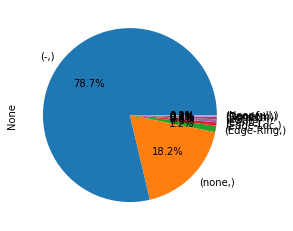

In [ ]:
fault_ratio = (pd.DataFrame(label).value_counts(normalize=True)*100)
pie_chart = fault_ratio.plot.pie(autopct='%.1f%%')
pie_chart

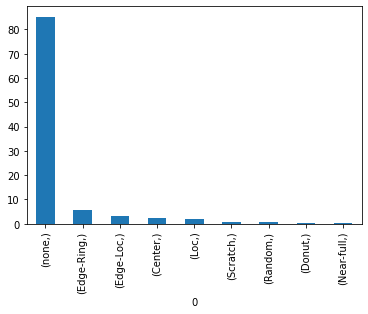

In [ ]:
fault_ratio.plot.bar()

In [ ]:
pd.DataFrame(label)

,0
0,none
1,none
2,none
3,none
4,none
...,...
172945,Edge-Loc
172946,Edge-Loc
172947,Edge-Ring
172948,Edge-Loc


In [ ]:
df['failureType'] = pd.DataFrame(label)

In [ ]:
condition = (df.trianTestLabel=='Training') # 54,355, labeled data
df[condition].failureType.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


none         36730
Edge-Ring     8554
Center        3462
Edge-Loc      2417
Loc           1620
Random         609
Scratch        500
Donut          409
Near-full       54
Name: failureType, dtype: int64

In [ ]:
condition = (df.trianTestLabel=='Test') # 118,595
df[condition].failureType.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


none         110701
Edge-Loc       2772
Loc            1973
Edge-Ring      1126
Center          832
Scratch         693
Random          257
Donut           146
Near-full        95
Name: failureType, dtype: int64

## fault type image

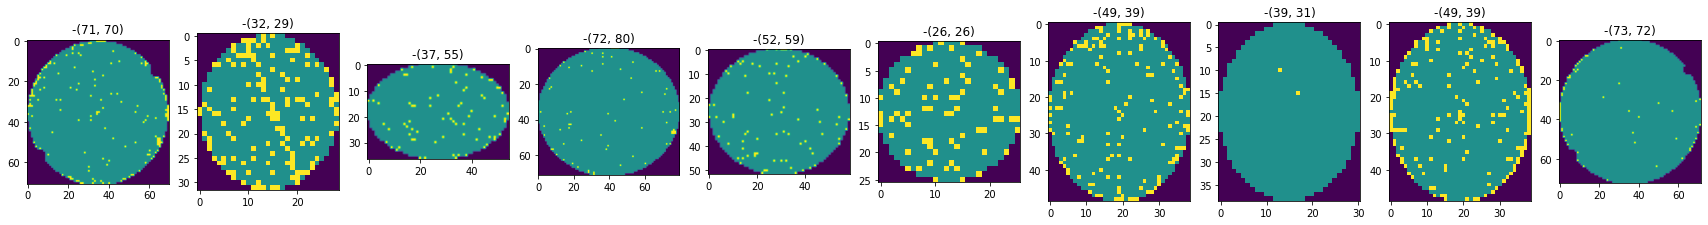

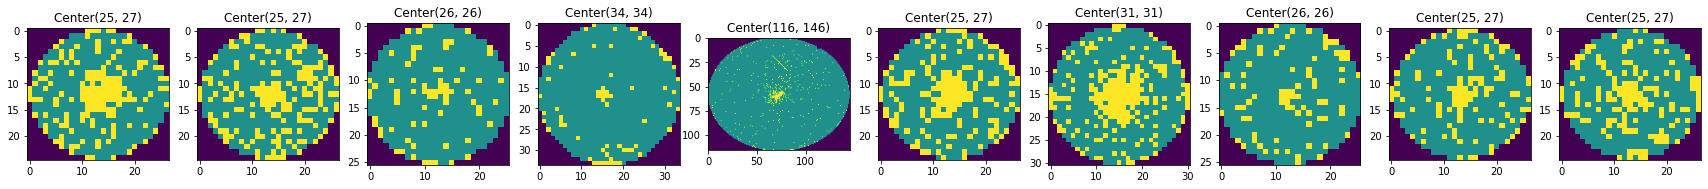

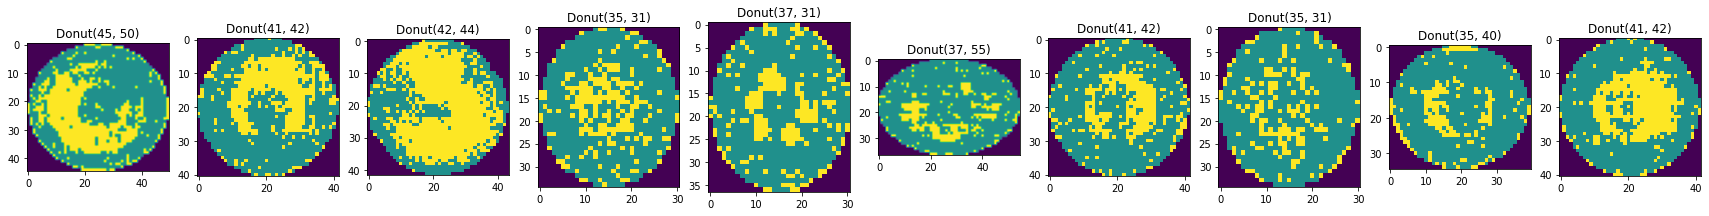

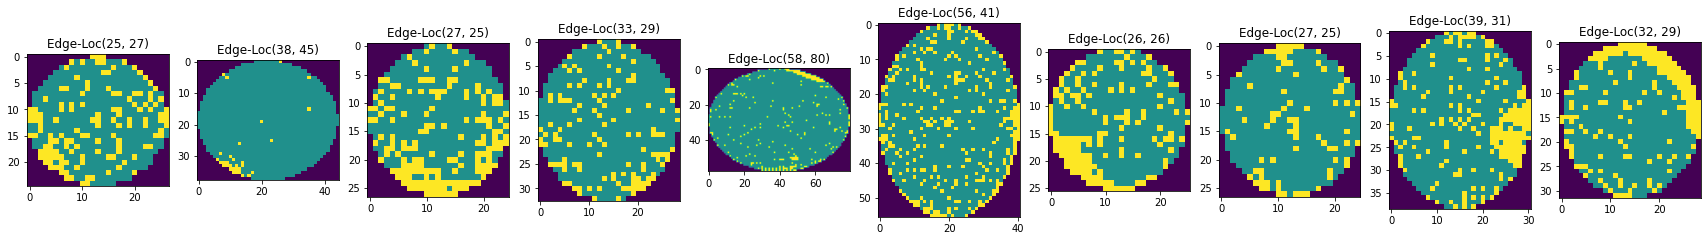

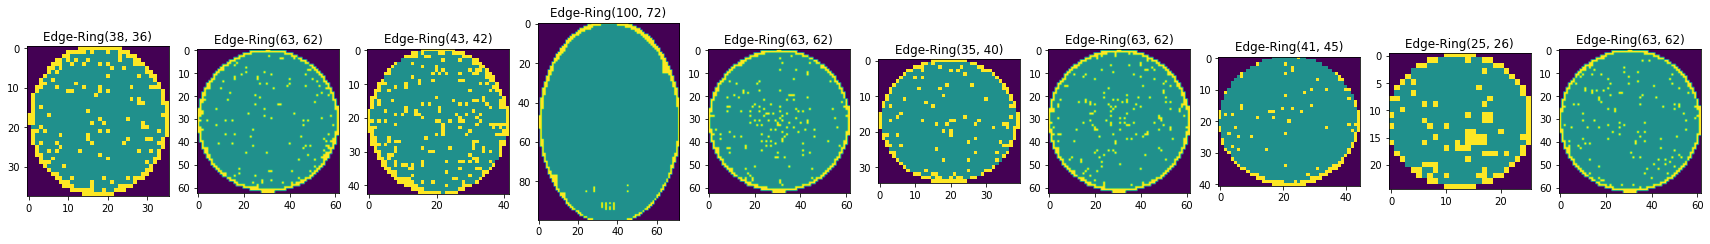

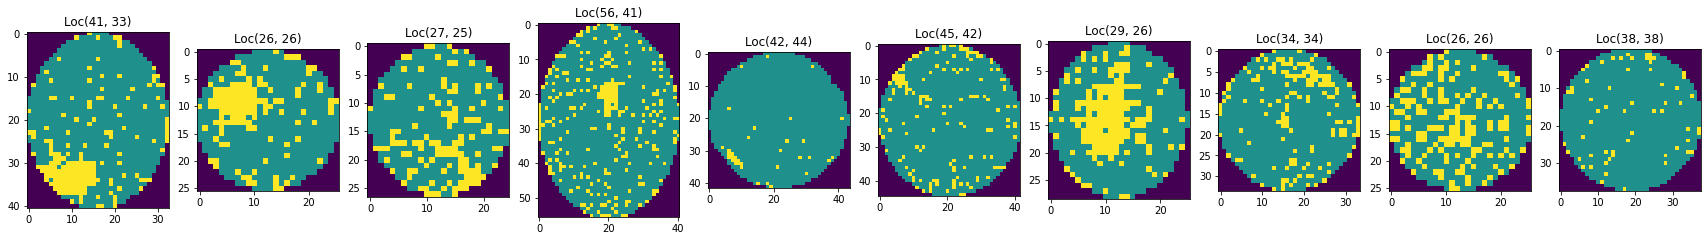

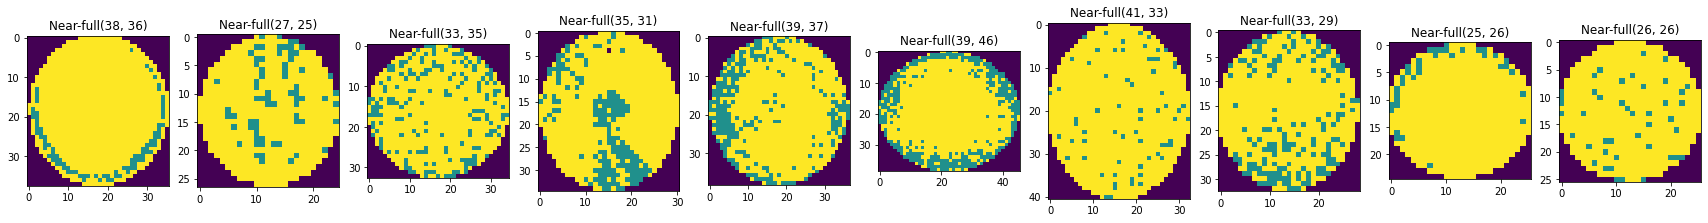

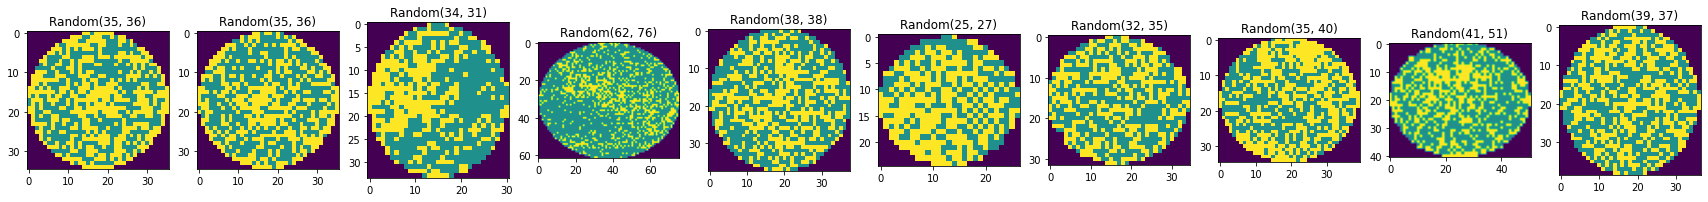

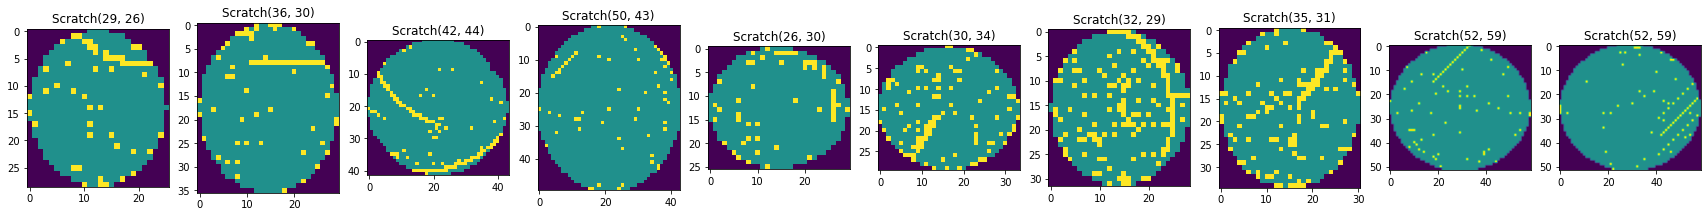

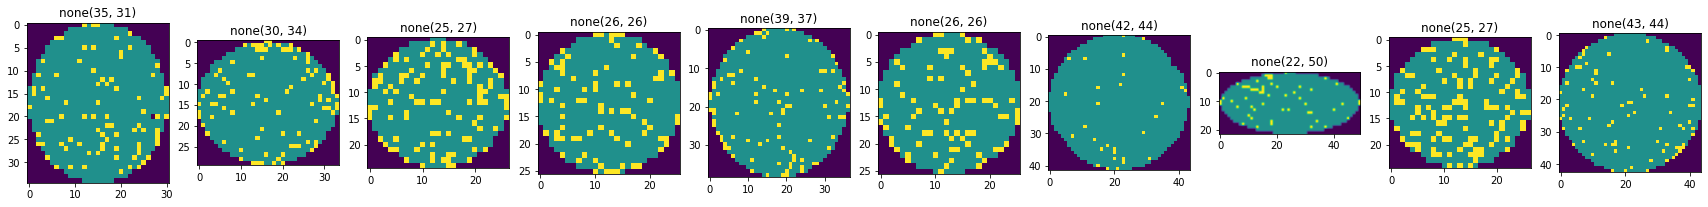

In [ ]:
def typ_images(n=5):
    for i, typ in enumerate(fault_list):
        condition = (df.failureType == typ)
        df_tmp = df.waferMap[condition].sample(n)
        fig_size = (n*3,6)
        fig = plt.figure(figsize=fig_size)

        for j in range(n):
            plt.subplot(1,n,j+1)
            img = df_tmp.iloc[j]
            plt.title(typ+str(img.shape))
            plt.imshow(img)
typ_images(10)

## dieSize

In [ ]:
wafer_size = list()
for i, img in enumerate(df.waferMap):
    wafer_size.append(img.shape)


In [ ]:
df['waferSize'] = wafer_size

NameError: ignored

In [ ]:
wafer_area = list()
for size in wafer_size:
    tmp = size[0]*size[1]
    wafer_area.append(tmp)

In [ ]:
df['waferArea'] = wafer_area

In [ ]:
df[['dieSize','waferArea']].corr() # dieSize & waferArea are correlated by linear relation

,dieSize,waferArea
dieSize,1.000000,0.998777
waferArea,0.998777,1.000000
